Graphiques comparant les types de tirs de toutes les équipes dans une saison



In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import sys
sys.path.append('../..') # Remonte au niveau du rep data
from data.pandas_conversion import get_dataframe_from_data
from graphiques_util import  afficher_graphique_typestir, afficher_graphique_distance_but,afficher_graphique_pourcentage_dist_types,afficher_graphique_pourcentage_dist_type
import warnings
warnings.filterwarnings("ignore")

In [24]:
# graphique comparant les types de tirs de toutes les équipes pour la saison 2018-2019
saison='20182019'
df= get_dataframe_from_data(saison)

# afficher les counts pour exploratiom
print('Tous les tirs',df.groupby('shotType').size())
print('buts',df[df['typeDescKey'] == 'goal'].groupby('shotType').size())

df.tail()

Tous les tirs shotType
backhand        7003
deflected       1679
slap           12248
snap           11967
tip-in          4500
wrap-around      887
wrist          47643
dtype: int64
buts shotType
backhand        825
deflected       264
slap            783
snap           1213
tip-in          769
wrap-around      60
wrist          4326
dtype: int64


,Unnamed: 0,teamId,period,timeInPeriod,shotType,xCoord,yCoord,shooterId,shooterName,goalieId,goalieName,typeDescKey
85934,78,19.0,1,16:47,tip-in,-71.0,-3.0,8475158.0,Ryan O'Reilly,8471695.0,Tuukka Rask,goal
85935,97,19.0,1,19:52,backhand,-74.0,1.0,8474565.0,Alex Pietrangelo,8471695.0,Tuukka Rask,goal
85936,250,19.0,3,11:25,snap,-67.0,3.0,8475170.0,Brayden Schenn,8471695.0,Tuukka Rask,goal
85937,270,19.0,3,15:22,snap,-77.0,7.0,8477482.0,Zachary Sanford,8471695.0,Tuukka Rask,goal
85938,282,6.0,3,17:50,wrist,44.0,24.0,8476891.0,Matt Grzelcyk,8476412.0,Jordan Binnington,goal


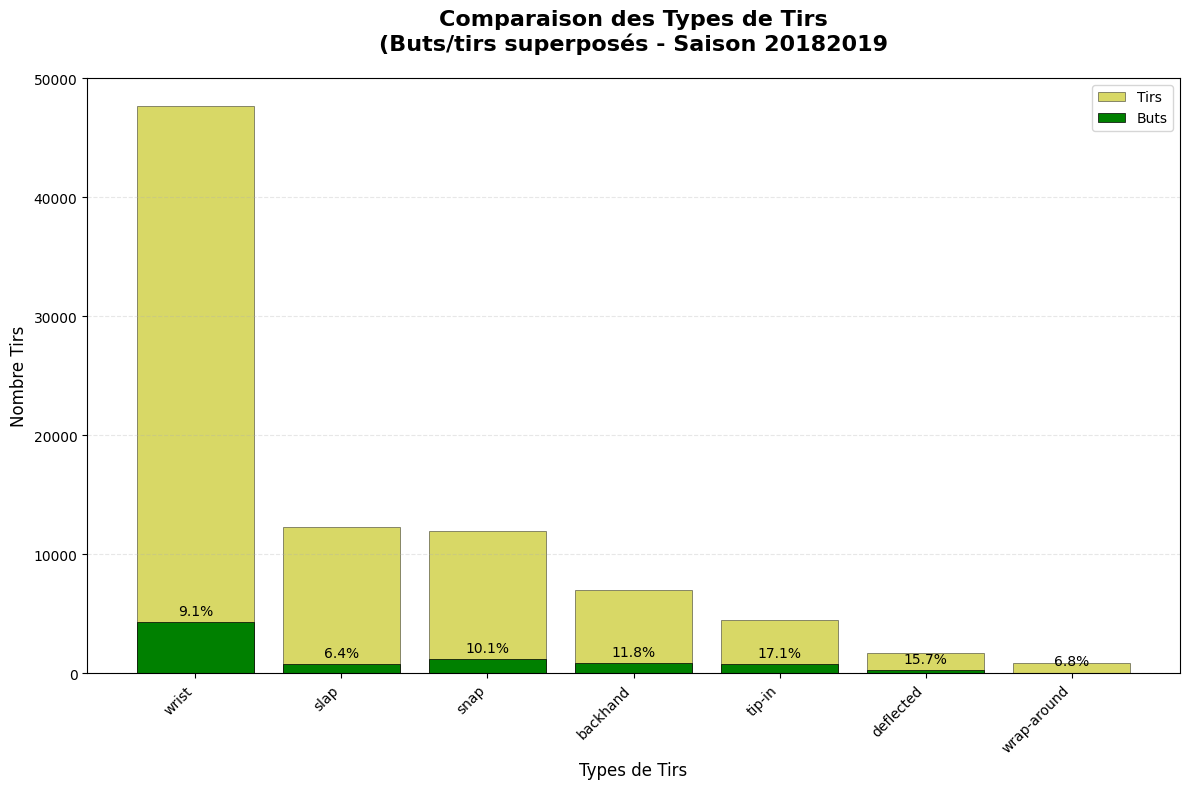

In [25]:
# fonction qui affiche un graphique comparant les types de tirs de toutes les équipes dans une saison 
saison='20182019'
afficher_graphique_typestir(df, saison)

<div style="border: 1px solid black; padding: 10px;">

##### Explication du graphique
Pourquoi ce type de graphique ?<br>
Le graphique des barres empilées (tirs en jaune + buts en vert) montrent simultanément le volume par type et la part des buts (les buts sont un sous-ensemble des tirs totaux). Ça permet d’identifier :<br>
*le type le plus fréquent (hauteur totale).<br>
*le type le plus dangereux (proportion de vert par rapport au jaune).<br>

le type de tir  "tip-in" semble le plus dangereux avec 17.1% de conversion. Le type de tir "wrist" est le type le plus courant avec un total de 47643 

 </div>

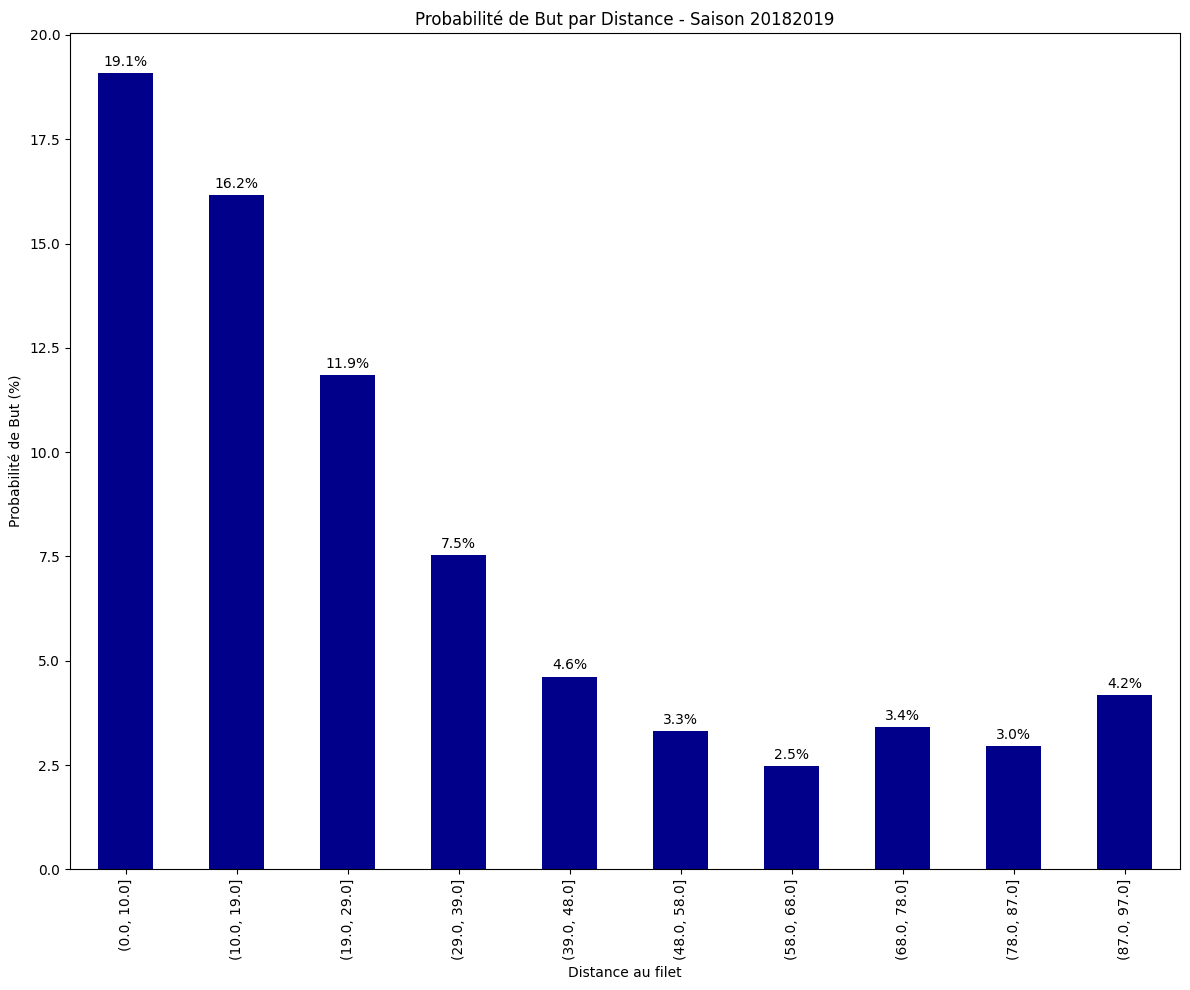

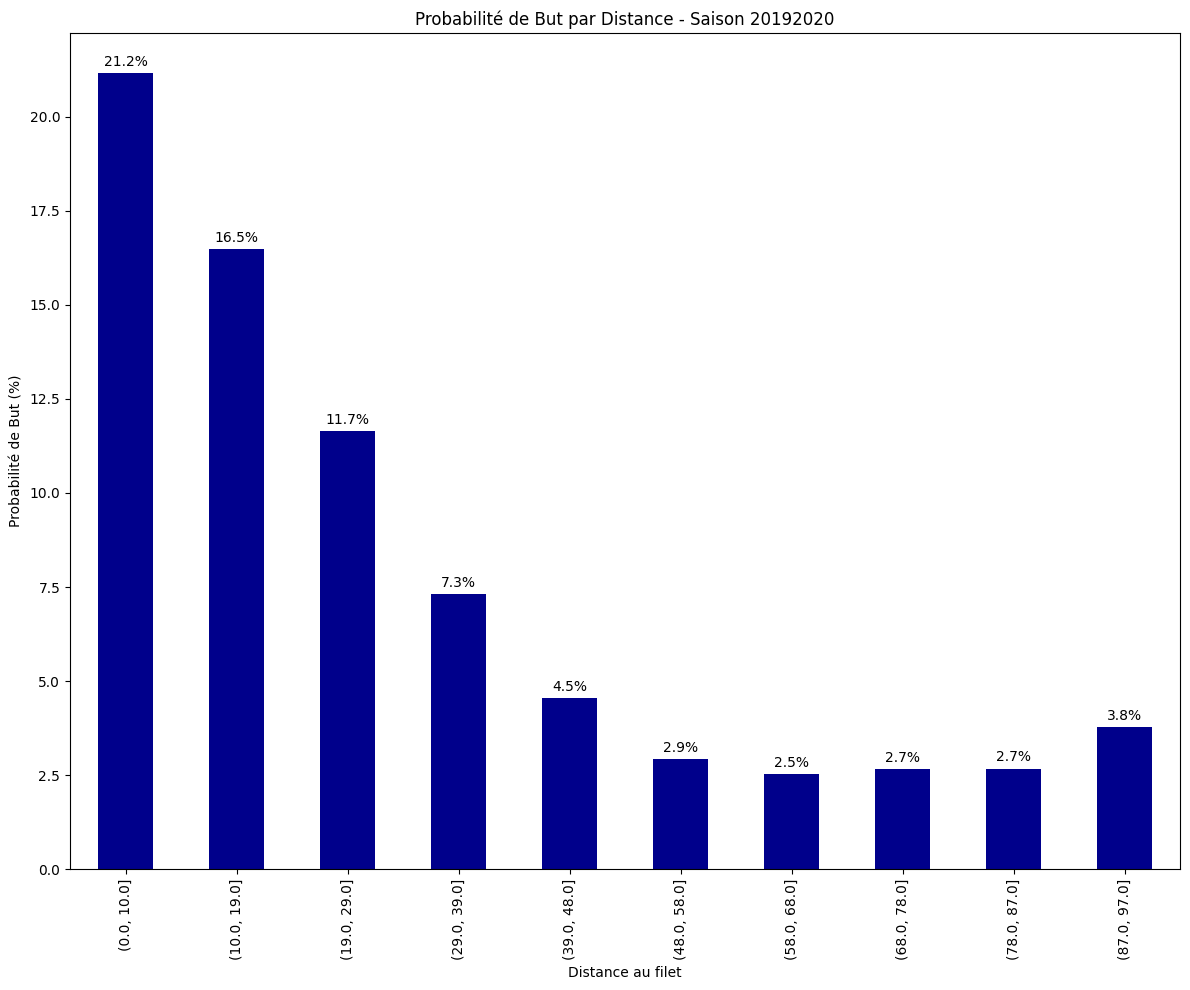

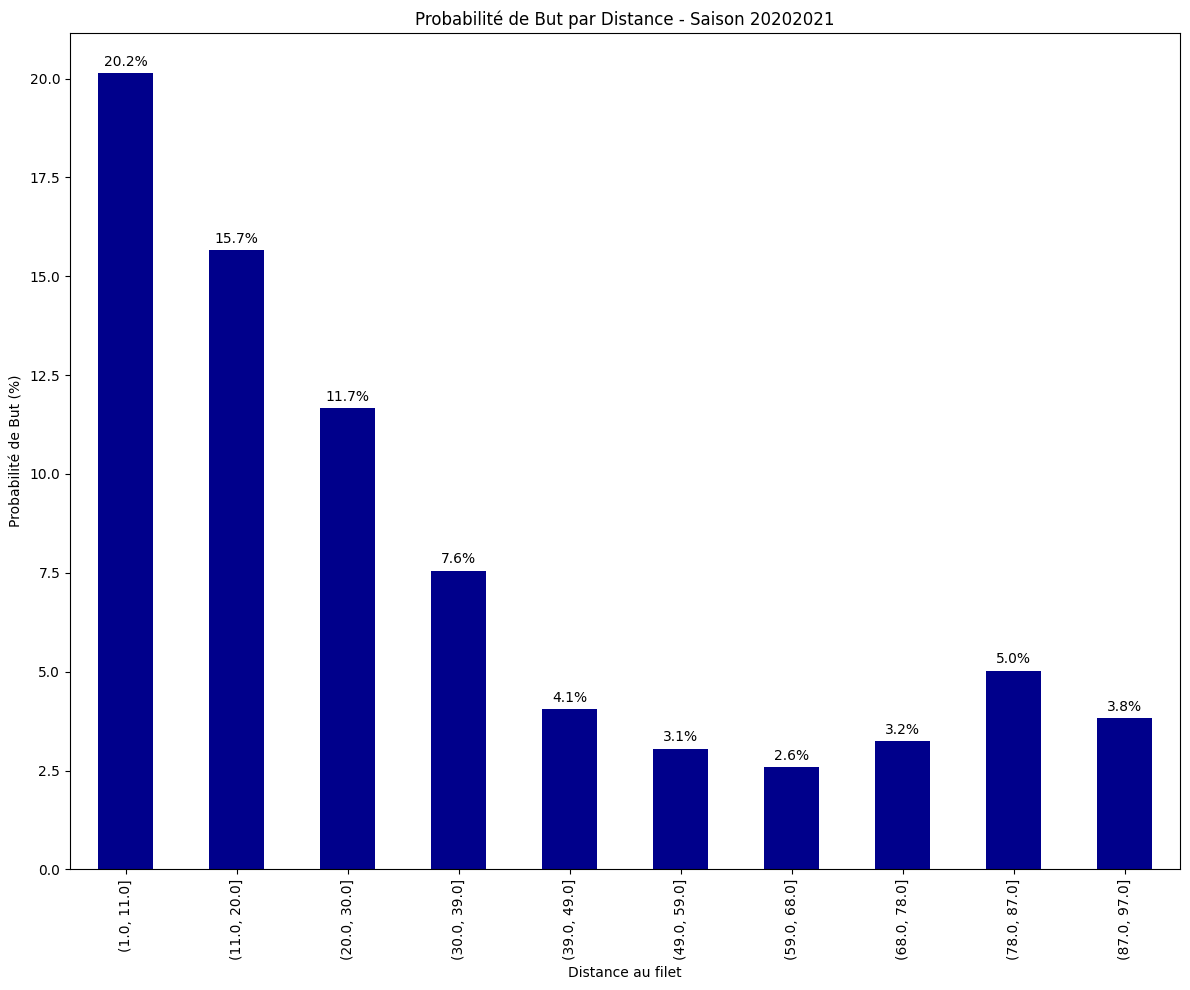

In [26]:

# on iterer sur les saisons 2018-19 a 2020-21
# et on affiche pour chaque saison un graphique a l'aide de la methode afficher_graphique_distance_but
#  Cette méthode analyse la relation entre la distance de tir et la probabilité de marquer un but,
#  en produisant une visualisation qui permet d'identifier les zones de tir les plus efficaces sur la patinoire.
saisons=['20182019','20192020','20202021']

for saison in saisons:
    df= get_dataframe_from_data(saison)
    afficher_graphique_distance_but(df,saison)


<div style="border: 1px solid black; padding: 10px;">

##### Relation entre la distance de tir et la probabilité de marquer un but

Approche:<br>
   *Calcule la distance de chaque tir au filet (distance euclicienne)<br>
   *Diviser les distances en des intervalles égaux (bins) pour calculer les probabilités comparables<br>
   *Calcule la probabilité de but pour chaque intervalle : (buts / tirs totaux) × 100 <br>
   *Afficher un graphique en barres montrant la probabilité par intervalle de distance<br>

Interpretation des 3 graphiques :<br> 
pour les données des 3 saisons  la relation distance → probabilité de but est clairement décroissance. Ce qui est normale plus on s'approche du filet plus la probabilité qu'un tir soit un but augmente. Les probabilités sont plus elevé pour les trois premiers intervalles :

Pour le premier intervalle 0–10 ft : ~19–21% (zone de rebonds devant le filet).

Deuxieme Intervalle 11–20 ft : ~16–16,5%.

Troisieme Intervalle 20–30 ft : ~11,7–11,9% .

la probabilité décroit ensuite lorsqu'on eu a >30 ft : ~2–7% 

Comparaison inter-saisons : la forme est stable (mêmes ordres de grandeur).
Les petites différences semblent compatibles avec l’aléa; pas de changement structurel évident entre 2018-19 et 2020-21.
pour les 3 saisons 
 </div>

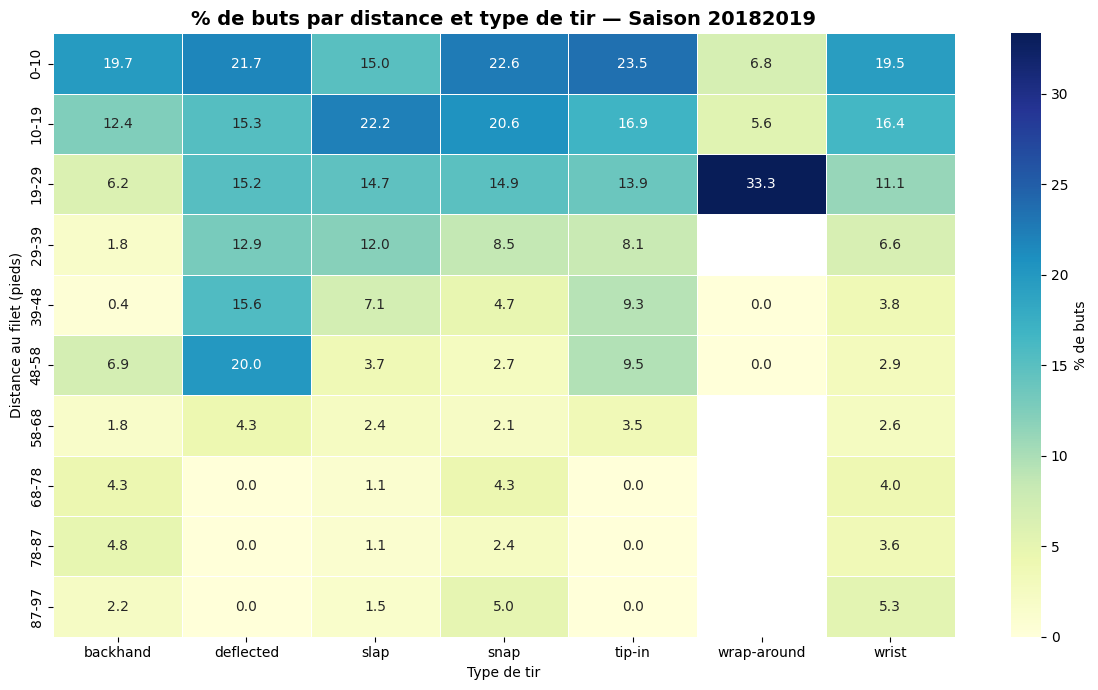

In [27]:
# graphique heatmap qui combine % buts en fonction de distance et type tir
saison ='20182019'
df=get_dataframe_from_data(saison)
afficher_graphique_pourcentage_dist_types(df,saison)

<div style="border: 1px solid black; padding: 10px;">

##### Graphique combiné

Pourquoi ce type de graphique ? <br>
Il combine proprement les deux dimensions demandées (distance × type) et permet la comparaison à distance égale.
Le code couleur rend immédiate la hiérarchie de dangerosité.

Tendance distance :  <br>
la probabilité de but baisse en s’éloignant du filet.

Types les plus dangereux (près du filet, 1–19 ft)

les valeurs de tip in très élevé à courte portée (16≈23.5%).

les valeurs de snap élevé à 11–28 ft (≈20–22%), puis chute avec la distance (en comparaison avec rapport a tip in).

les valeurs de wrist modéré (≈16–19% à courte portée), chute ensuite.

les valeurs de backhand plutôt modeste (≈12–19% près du filet).

les valeurs de slap faible sauf très près du filet; 


les valeurs de wrap-around sont rares (une classe minoritaire), le % est non interprétable avec peu de données.

Conclusion : la proximité au filet domine; les tip-ins et snap shots convertissent le mieux à courte distance. À ≥58–87 ft, tous les types tombent bas (≈0–5%).


<br>


 </div>

##### ces graphique sont plus pour la comprehension seulement

In [ ]:
# graphique  probalité en fonction de distance pour chaque type tir (plus pour la comprehension seulement )
saison ='20182019'
df=get_dataframe_from_data(saison)
afficher_graphique_pourcentage_dist_type(df,saison)